# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
flights = sns.load_dataset('flights')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [9]:
# Matrix form for correlation data
num = tips.select_dtypes(include='number')
num.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

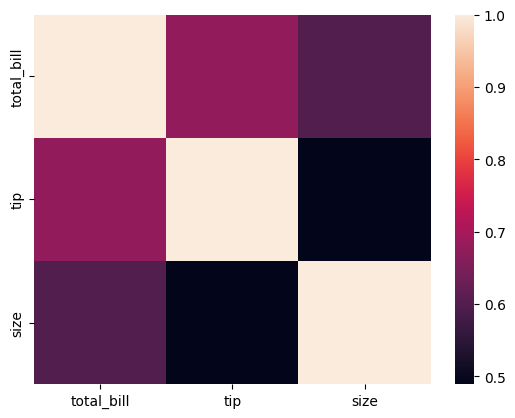

In [10]:
sns.heatmap(num.corr())

<Axes: >

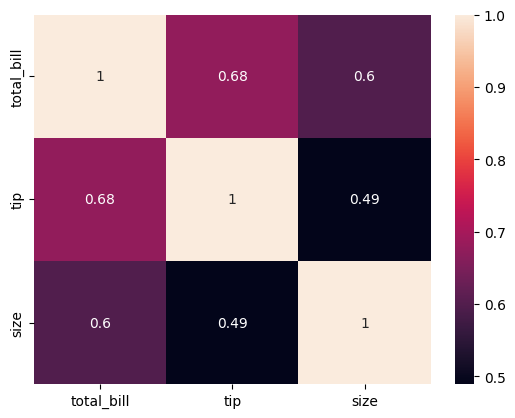

In [11]:
# Annotations
sns.heatmap(num.corr(),annot=True)

<Axes: >

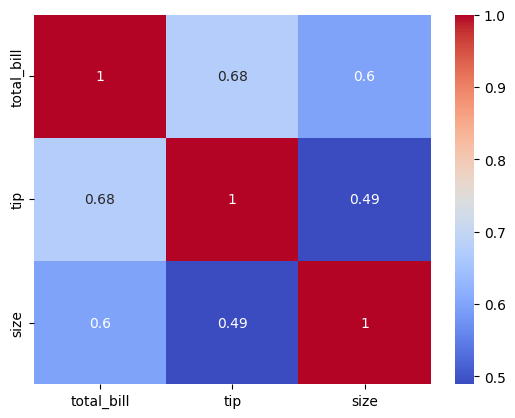

In [13]:
# Color Mapping
sns.heatmap(num.corr(),annot=True, cmap='coolwarm')

In [15]:
flights.pivot_table(index='month', columns='year',values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


In [16]:
fp = flights.pivot_table(index='month', columns='year',values='passengers')

<Axes: xlabel='year', ylabel='month'>

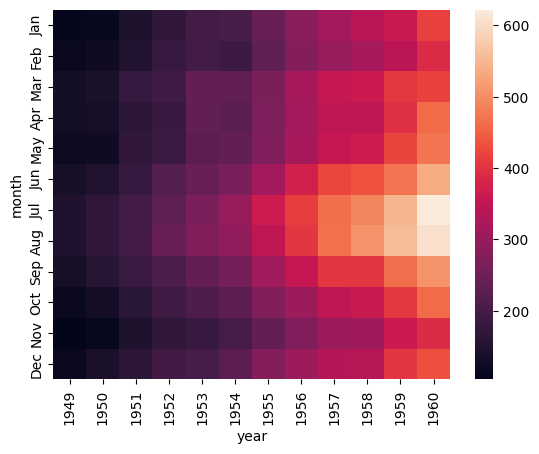

In [17]:
sns.heatmap(fp)

<Axes: xlabel='year', ylabel='month'>

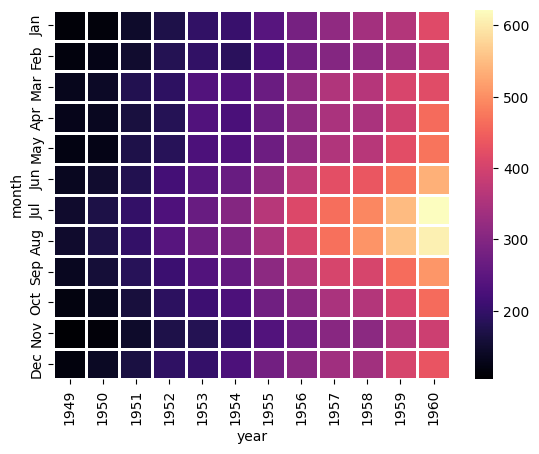

In [19]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidth=1)

<Axes: xlabel='year', ylabel='month'>

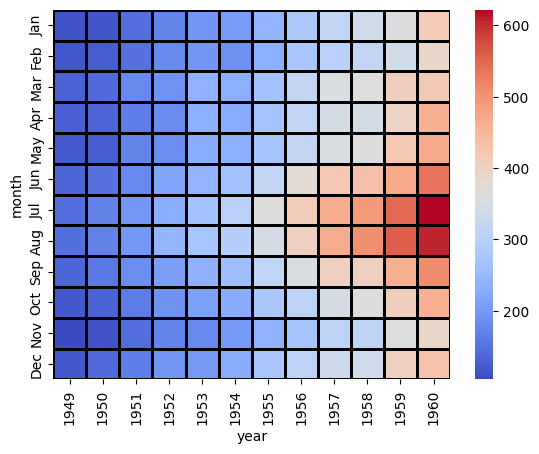

In [20]:
sns.heatmap(fp,cmap='coolwarm',linecolor='black',linewidth=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

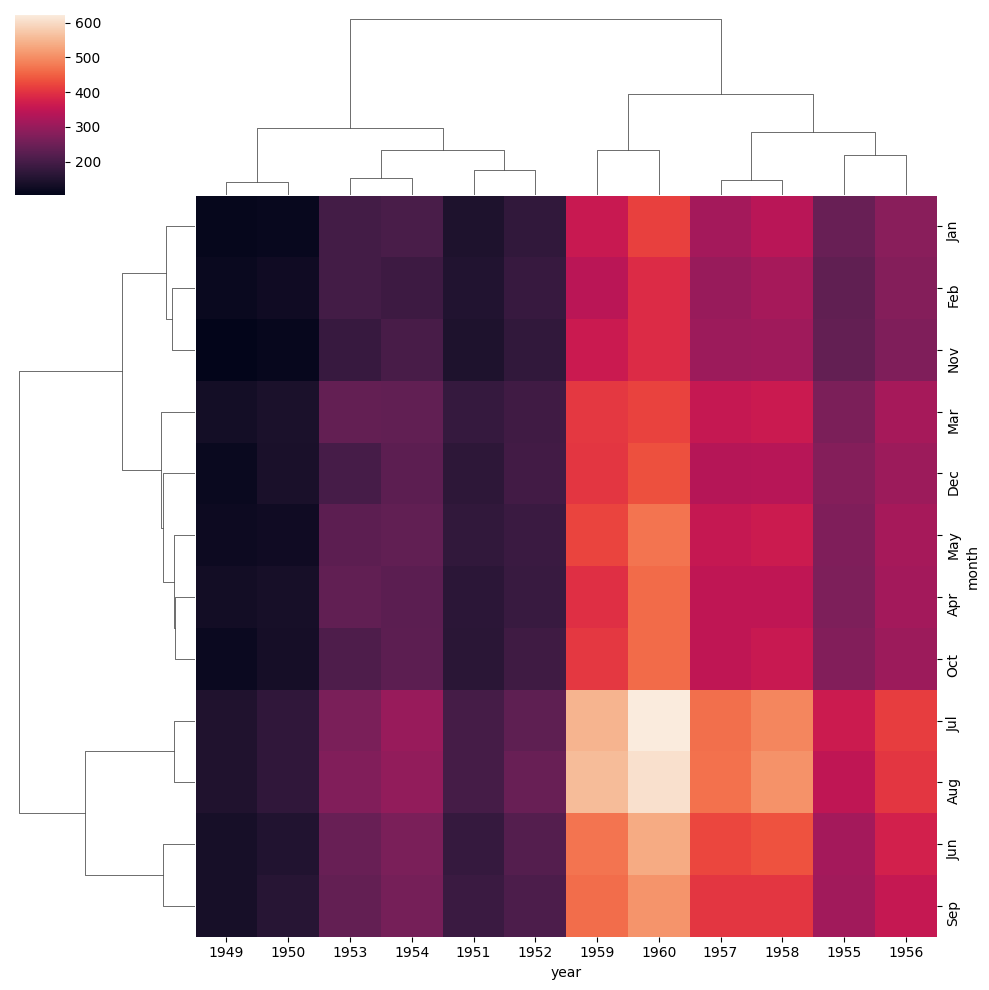

In [21]:
sns.clustermap(fp)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

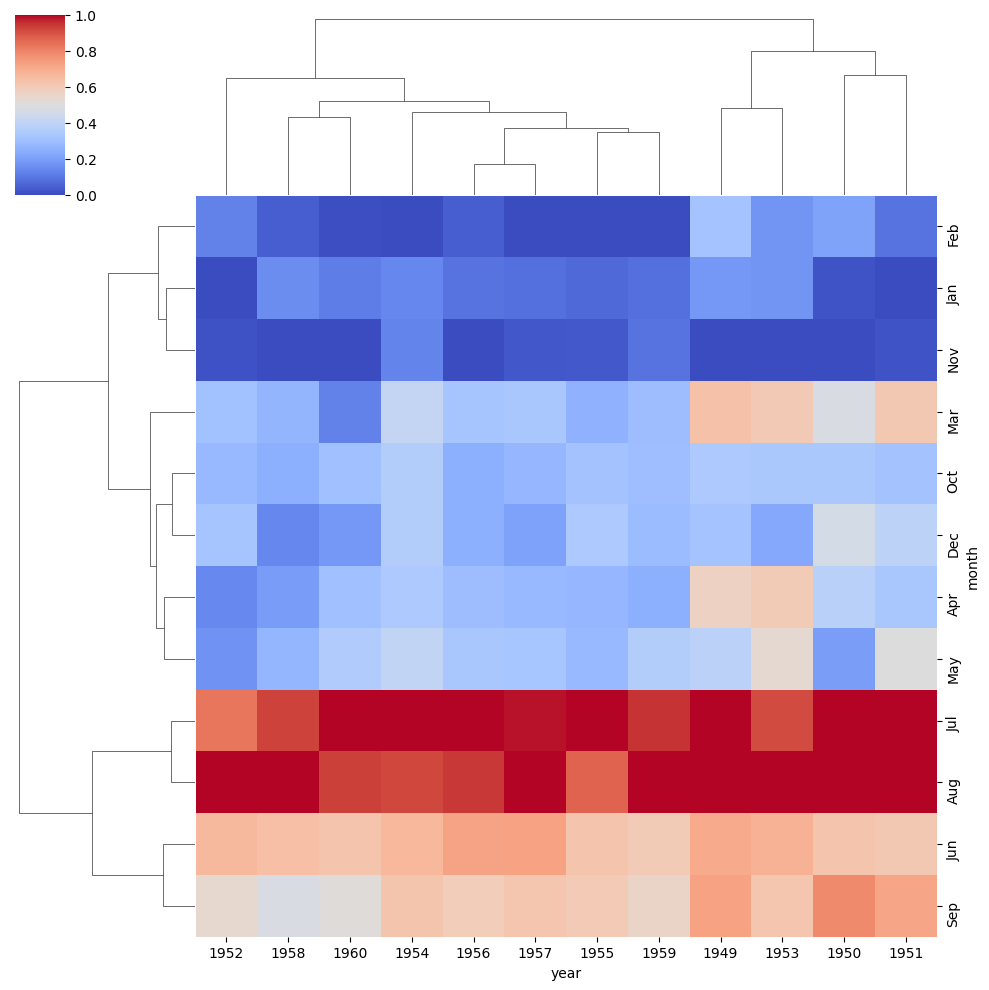

In [23]:
# More options to get the information a little clearer like normalization
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)